In [1]:
import ete3
import os
import re
import random
import subprocess
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from itertools import combinations, product
from scipy.spatial.distance import squareform

%matplotlib inline
%cd /work/site_rate/hug_et_al

/work/site_rate/hug_et_al


In [2]:
tree = ete3.Tree('ribosomal_concat_ml_tree-regular_support.tre-bak', format=1)
bacteria     = []
archaea      = []
eukarya      = []
for leaf in tree.get_leaf_names():
    if leaf.startswith('Bacteria'):
        bacteria.append(leaf)
    elif leaf.startswith('Archaea'):
        archaea.append(leaf)
    elif leaf.startswith('Eukaryota'):
        eukarya.append(leaf)

tree.set_outgroup(eukarya[0])
bacteria_ancestor = tree.get_common_ancestor(bacteria)
tree.set_outgroup(bacteria_ancestor)

In [15]:
random.seed(12345)
for filename in 'no_fast_evolving_sites just_mid_evolving_sites no_slow_evolving_sites'.split():
    out = open('%s_tree_sample' % filename, 'w')
    for line in random.sample(open('best_phylogenies/%s.aln.ufboot' % filename).readlines(), 100):
        tmpTree = ete3.Tree(line)
        tmpTree.set_outgroup(bacteria[0])
        subtree = tmpTree.get_common_ancestor(archaea+eukarya).copy()
        out.write(subtree.write(format=5))
#        out.write(line)
        out.write('\n')
    out.close()

    out = open('%s_tree_sample1' % filename, 'w')
    for line in random.sample(open('best_phylogenies/lg_f_g/%s.aln_F.ufboot' % filename).readlines(), 100):
        tmpTree = ete3.Tree(line)
        tmpTree.set_outgroup(bacteria[0])
        subtree = tmpTree.get_common_ancestor(archaea+eukarya).copy()
        out.write(subtree.write(format=5))
#        out.write(line)
        out.write('\n')

    out.close()
    subprocess.call(['iqtree', '-redo',
                     '-t',  '%s_tree_sample' % filename,
                     '-rf', '%s_tree_sample1' % filename])

In [13]:
tmpTree.set_outgroup(bacteria[0])

In [14]:
len(tmpTree.get_common_ancestor(archaea+eukarya))

399

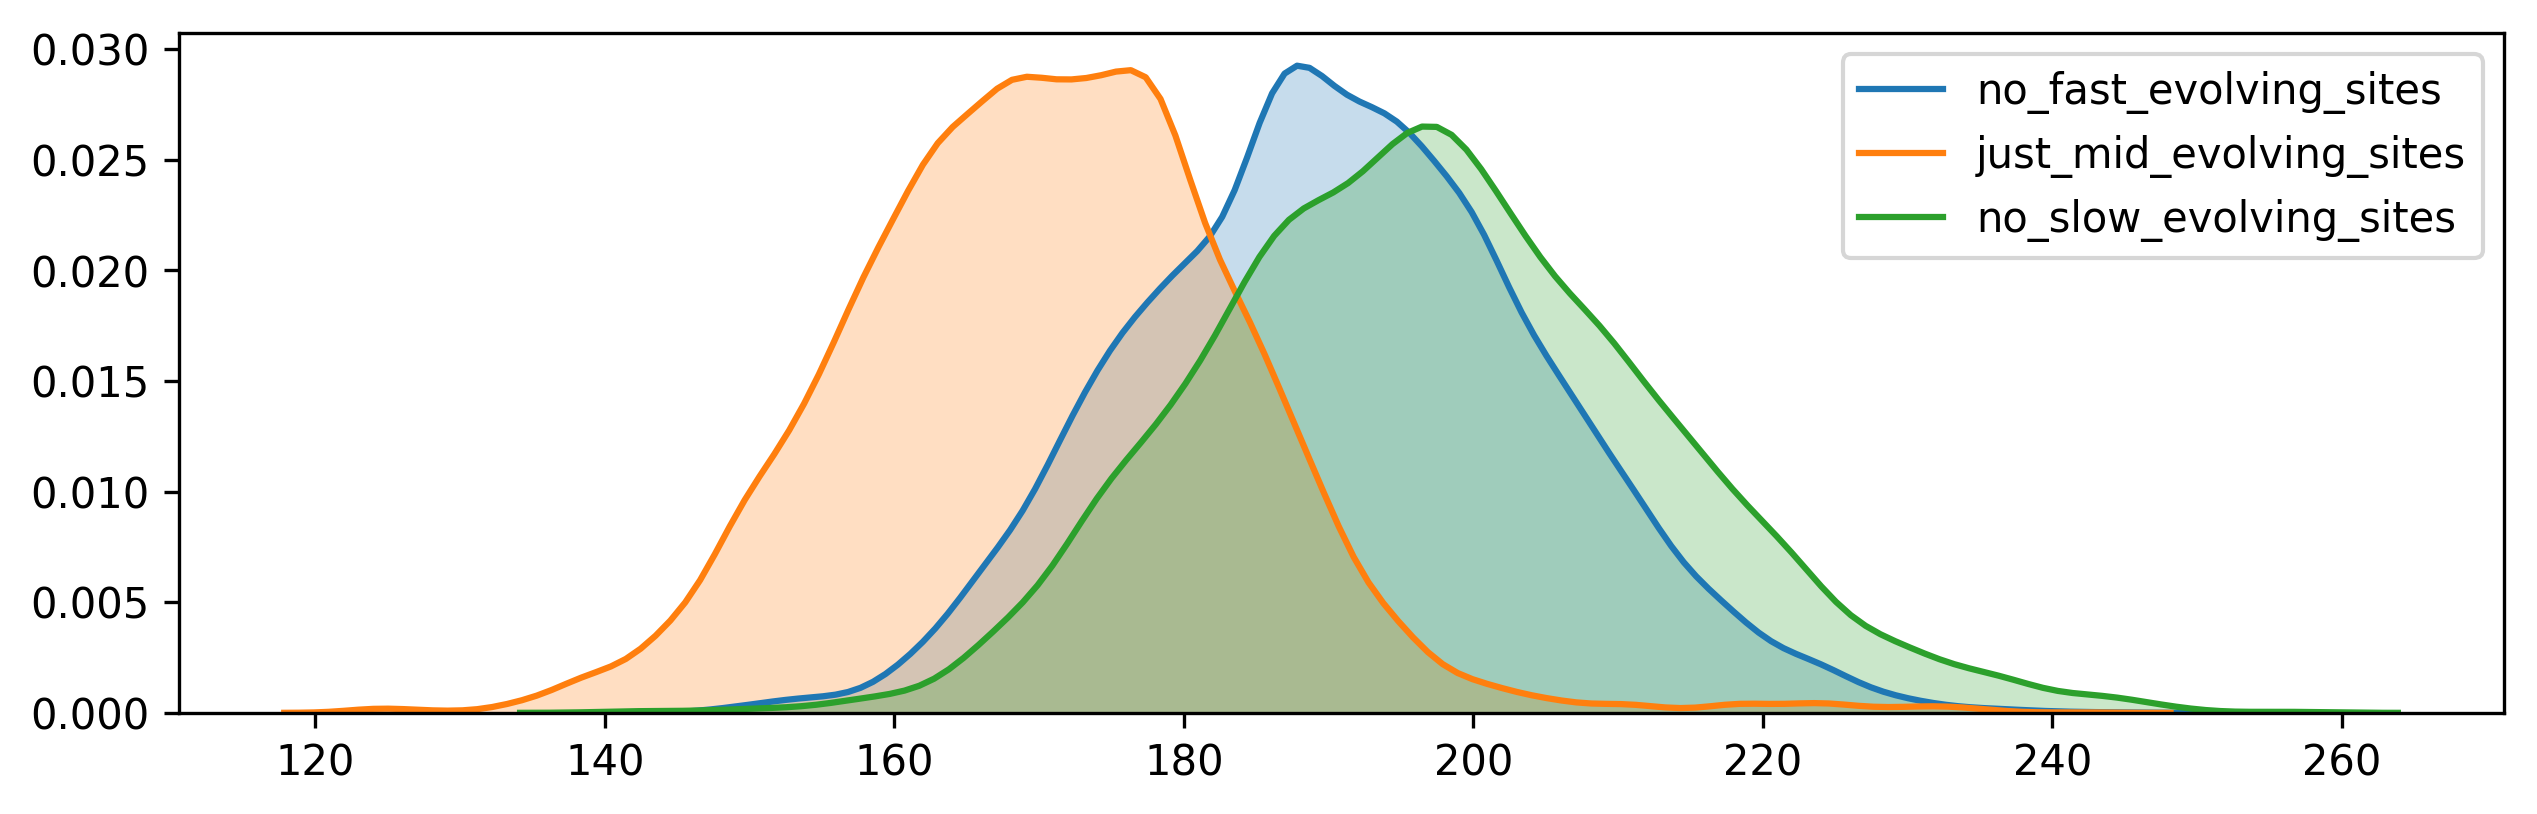

In [18]:
fig, ax = plt.subplots(dpi=300, figsize=(10,3))
for filename in 'no_fast_evolving_sites just_mid_evolving_sites no_slow_evolving_sites'.split():
    rows = []
    for line in open('%s_tree_sample.rfdist' % filename).readlines()[1:]:
        rows.extend([int(x) for x in line.split()[1:]])
    sns.kdeplot(rows, shade=True, label=filename, ax=ax)

/Users/thiberio/anaconda2/envs/py37/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


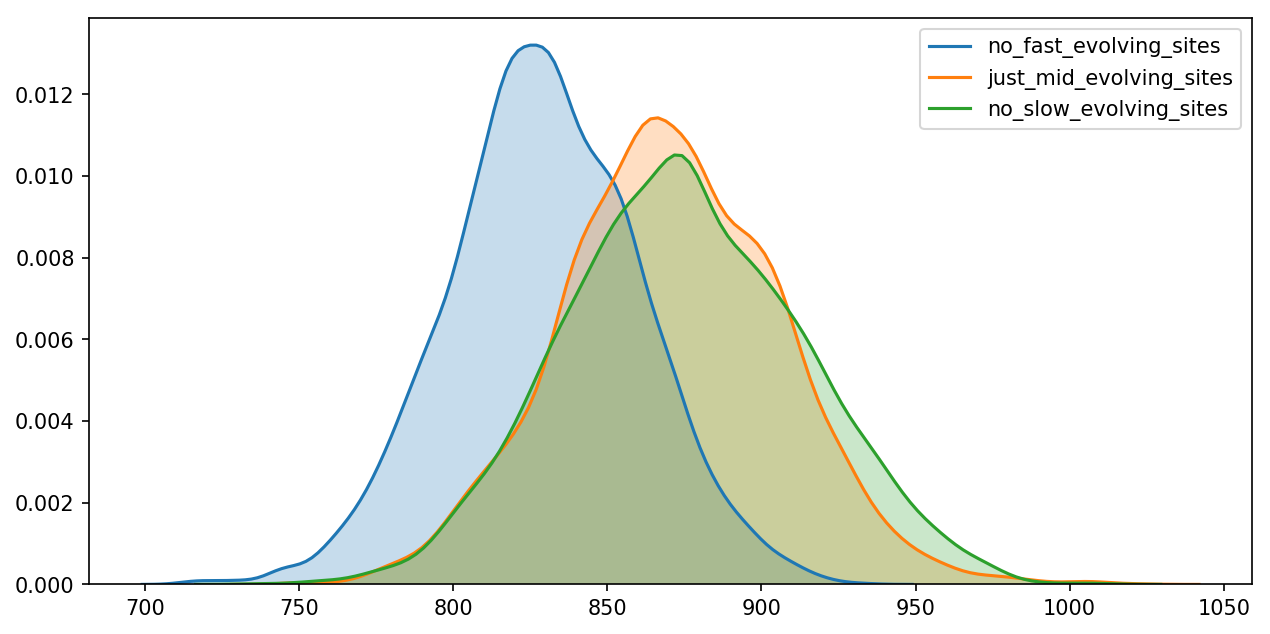

In [6]:
fig, ax = plt.subplots(dpi=150, figsize=(10,5))
for filename in 'no_fast_evolving_sites just_mid_evolving_sites no_slow_evolving_sites'.split():
    rows = []
    for line in open('%s_tree_sample.rfdist' % filename).readlines()[1:]:
        rows.extend([int(x) for x in line.split()[1:]])
    sns.kdeplot(rows, shade=True, label=filename, ax=ax)

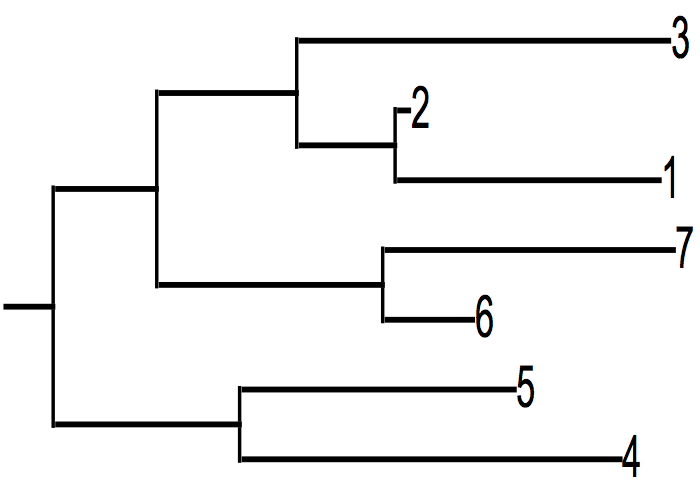

In [53]:
random.seed(12345)
t = ete3.Tree()
t.populate(7, names_library=range(1,8), random_branches=True)
for node in t.traverse():
    node.img_style['size'] = 0
    node.img_style["vt_line_width"] = 1.2
    node.img_style["hz_line_width"] = 1.2

t.dist                   = 0.1
t.children[0].dist       = 0.2
t.children[1].dist       = 0.36

style                    = ete3.TreeStyle()
style.draw_guiding_lines = True
style.show_scale         = False

t.render(file_name='%%inline', tree_style=style, dpi=300, h=500, w=700)

In [57]:
t.get_leaves()[1].dist

0.02687003439279234